 # $\color{green}{\text{First Implementation (NN)}}$


##  $\color{red}{\text{Importing libraries}}$

*Python import/libraries kits for machine learning programming, including PyTorch for model building, Pandas for data management, and Matplotlib for visualization.*


In [175]:
#Author: Awara Pirkhdrie
#Date: 2024-02-20


import torch
from torch import nn
from torch import optim
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F


##  $\color{red}{\text{Loading dataset (train dataset)}}$

*Loads a training data CSV file into a Pandas DataFrame and prints the first few rows to preview the data.*

In [176]:
_df_train = pd.read_csv('train.csv')
print(_df_train.head())

   Unnamed: 0         x         y
0           0  0.771270  2.474538
1           1  0.063558  1.192772
2           2  0.863103  2.912784
3           3  0.025419  1.078507
4           4  0.731994  2.473164



##  $\color{red}{\text{Loading dataset (test dataset)}}$

*Loads a testning data CSV file into a Pandas DataFrame and prints the first few rows to preview the data.*

In [177]:
_df_test = pd.read_csv('test.csv')
print(_df_test.head())

   Unnamed: 0         x         y
0           0  0.304614  1.615251
1           1  0.155995  1.347700
2           2  0.662522  2.234106
3           3  0.107891  1.298501
4           4  0.909320  2.893834


##  $\color{red}{\text{Prepare dataset [Train and Test]}}$

*Converts columns from Pandas DataFrames to PyTorch tensors for use as training and test data within machine learning models, specifying data types and dimensions.*

In [178]:
_x_train = torch.tensor(_df_train["x"].values, dtype=torch.float32).unsqueeze(1)
_y_train = torch.tensor(_df_train["y"].values, dtype=torch.float32)

_x_test = torch.tensor(_df_test["x"].values, dtype=torch.float32).unsqueeze(1)
_y_test = torch.tensor(_df_test["y"].values, dtype=torch.float32)


##  $\color{red}{\text{Plotting dataset}}$

*Uses Matplotlib to visualize training and test data as scatterplots on a graph, includes a legend, and displays the graph.*

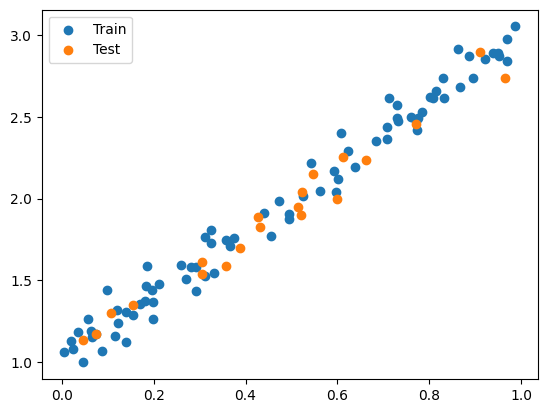

In [190]:
plt.scatter(_x_train, _y_train, label='Train')
plt.scatter(_x_test, _y_test, label='Test')
plt.legend()
plt.show()


##  $\color{red}{\text{Building the NN model}}$

*Defines a single-layer linear neural network model using PyTorch and prints the model's configuration.*

In [180]:
_define_nn_model = nn.Linear(1, 1)
print(_define_nn_model)


Linear(in_features=1, out_features=1, bias=True)


##  $\color{red}{\text{Define the loss function}}$

*Creates a loss function using PyTorch to calculate the root mean square error, a common method for measuring performance in regression models.*

In [181]:
_define_loss_function = nn.MSELoss()


##  $\color{red}{\text{Optimizer}}$

*Lists the parameters of a neural network model and initializes a stochastic gradient descent (SGD) optimizer to train the model with a learning rate of 0.1.*

In [182]:
_define_nn_model.parameters()

for name, param in _define_nn_model.named_parameters():
    print(f"Name: {name}\nParameter: {param}")

_optimizer = optim.SGD(_define_nn_model.parameters(), lr=0.1)

Name: weight
Parameter: Parameter containing:
tensor([[-0.8567]], requires_grad=True)
Name: bias
Parameter: Parameter containing:
tensor([-0.7141], requires_grad=True)



##  $\color{red}{\text{Training loop}}$

*Sets up an optimization loop to train a neural network model, updates the weights through backpropagation, and saves the loss history over multiple epochs.*

In [183]:
_optimizer = optim.SGD(_define_nn_model.parameters(), lr=0.1)
_epochs_n = 500
_loss_hist = []

for i in range(_epochs_n):
    _optimizer.zero_grad()
    _y_pred = _define_nn_model(_x_train)
    _loss = _define_loss_function(_y_pred.squeeze(), _y_train)
    _loss.backward()
    _optimizer.step()
    _loss_hist.append(_loss.item())


##  $\color{red}{\text{Plotting}}$

*Generates a set of evenly distributed points between the smallest and largest values in the training data and plots the graph with regression analysis.*

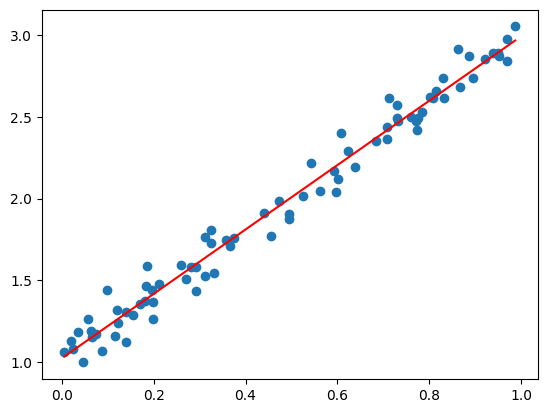

In [192]:
_x_viz = torch.linspace(_x_train.min(), _x_train.max(), 100).unsqueeze(1)
_y_viz = _define_nn_model(_x_viz)

plt.scatter(_x_train, _y_train)
plt.plot(_x_viz.detach(), _y_viz.detach(), "r")

*Uses Matplotlib to plot a loss history over the number of training iterations, visualizing the model's learning progress over time.*

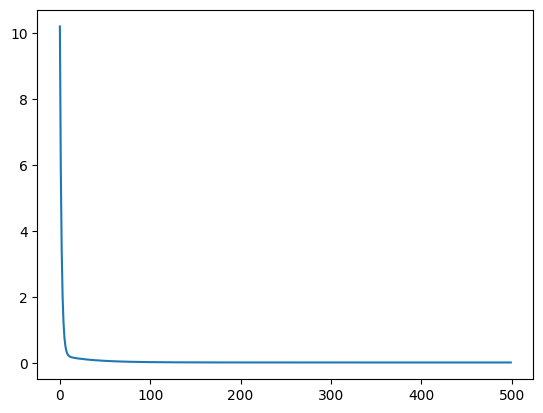

In [193]:
plt.plot(range(_epochs_n), _loss_hist)


##  $\color{red}{\text{Testing model on test dataset}}$

*Calculates predictions on test data using a neural network model and measures model performance by L1 loss, which shows the mean absolute error between predictions and actual values.*

In [194]:
_y_pred_test_lr = _define_nn_model(_x_test)

_l1_loss = F.l1_loss(_y_pred_test_lr.squeeze(), _y_test)
print(f"L1 Loss: {_l1_loss.item():.4f}")

L1 Loss: 0.0736


 # $\color{green}{\text{Second Implementation: Training a convolutional neural network (CNN)}}$


##  $\color{red}{\text{Importing libraries}}$

*Import statements for Python libraries and modules fundamental to machine learning and deep learning with PyTorch. It includes tools for data management (Dataset and DataLoader), image transformations (ToTensor), tensor calculations, network construction (nn), activation functions (F), optimization algorithms (optim), and visualization of data (matplotlib.pyplot). These imports lay the foundation for building, training and evaluating neural network models as well as visualizing results and datasets.*

In [195]:
#Author: Awara Pirkhdrie
#Date: 2024-02-20

import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torchvision
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn


##  $\color{red}{\text{Downloaing dataset}}$

*Loads the CIFAR-10 dataset for training and testing with PyTorch's torch vision, includes a transformation to tensors, and saves the data locally.*

In [196]:
_train_dataset = torchvision.datasets.CIFAR10(root="./data/", train=True, transform=ToTensor(), download=True)
_test_dataset = torchvision.datasets.CIFAR10(root="./data/", train=False, transform=ToTensor(), download=True)

100%|██████████| 170498071/170498071 [00:02<00:00, 78887825.47it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data/
Files already downloaded and verified



##  $\color{red}{\text{Checking one of the images}}$

*Defines a function to display a sequence of images from a dataset with their respective class labels and uses it to display the first five images from the training dataset.*

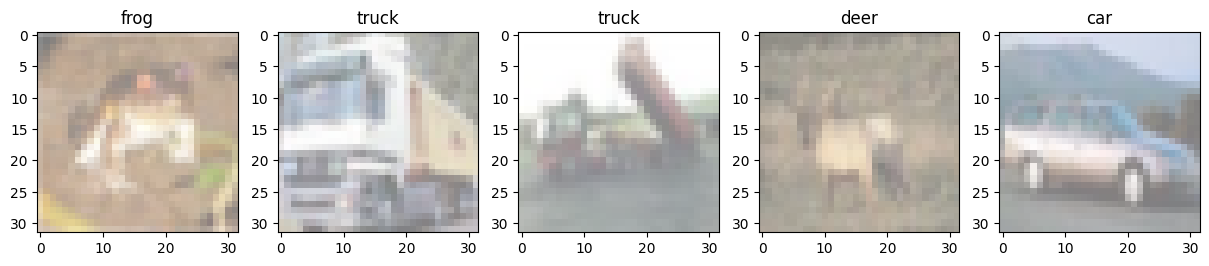

In [197]:
def show_images(images, labels, classes, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        _image = images[i][0] / 2 + 0.5
        plt.imshow(np.transpose(_image.numpy(), (1, 2, 0)))
        plt.title(classes[labels[i]])
    plt.show()

show_images([_train_dataset[i] for i in range(5)], [_train_dataset[i][1] for i in range(5)], classes)


##  $\color{red}{\text{Converting images to tensors}}$

*Loads the CIFAR-10 dataset for training and testing, applies a transformation to convert the images to tensors, and returns the transformed training and testing datasets.*

In [198]:
_train_ds = torchvision.datasets.CIFAR10(root="./data/", train=True, transform=ToTensor())
_test_ds = torchvision.datasets.CIFAR10(root="./data/", train=False, transform=ToTensor())
_train_ds, _test_ds

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ./data/
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ./data/
     Split: Test
     StandardTransform
 Transform: ToTensor())


##  $\color{red}{\text{Batch size and DataLoader}}$

*Creates DataLoader instances for both the training and test datasets using CIFAR-10, sets the batch size to 64, and decides to shuffle the training data.*

In [199]:
batch_size = 64

_train_loader = DataLoader(_train_dataset, batch_size=batch_size, shuffle=True)
_test_loader = DataLoader(_test_dataset, batch_size=batch_size, shuffle=False)
_train_loader, _test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7adf1de97be0>,
 <torch.utils.data.dataloader.DataLoader at 0x7adf1de950f0>)


##  $\color{red}{\text{Checking one batch of dataloader}}$

*Iterates through the training data loader once, printing the shape of labels and images in the first batch, then exits the loop.*

In [200]:
for image, labels in _train_loader:
    print(f"Labels Shape: {labels.shape}\nImage  Shape: {image.shape}")
    break

Labels Shape: torch.Size([64])
Image  Shape: torch.Size([64, 3, 32, 32])



##  $\color{red}{\text{Visualizing one batch of images}}$

Define Classes

*Defines a tuple of class names for the CIFAR-10 dataset, including airplane, car, bird, cat, deer, dog, frog, horse, ship, and truck.*

In [201]:
_class_names = (
    "plane", "car", "bird", "cat",
    "deer", "dog", "frog", "horse",
    "ship", "truck"
)

Display Image Function

*Defines a function to display an image by denormalizing a PyTorch tensor and converting it to a NumPy array for visualization with Matplotlib.*

In [202]:
def _show_image(_image_tensor):
    _image_tensor = _image_tensor / 2 + 0.5  # Denormalize
    _np_image = _image_tensor.numpy()
    plt.imshow(np.transpose(_np_image, (1, 2, 0)))
    plt.show()


Fetch and Display Images from DataLoader

*Retrieves a batch of images and labels from a data loader, displays an image grid of the images, and prints the class names of each image in the batch based on their labels.*

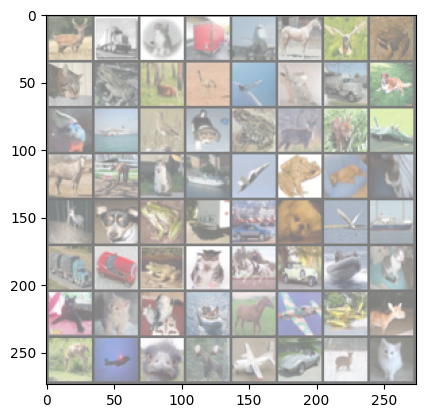

deer  truck cat   truck plane horse bird  frog  
cat   frog  deer  bird  plane cat   truck dog   
bird  ship  bird  dog   frog  deer  deer  plane 
horse horse cat   ship  plane frog  dog   cat   
deer  dog   frog  truck car   dog   bird  ship  
truck car   frog  cat   horse car   ship  cat   
cat   cat   cat   ship  horse plane plane deer  
deer  plane bird  deer  plane car   deer  cat   


In [203]:
from torchvision import utils

_data_iterator = iter(_train_loader)
_images, _labels = next(_data_iterator)

_show_image(utils.make_grid(_images))

for _i in range(8):
    for _j in range(8):
        _label_index = _i * 8 + _j
        if _label_index < len(_labels):
            print(f"{_class_names[_labels[_label_index]]:5s}", end=" ")
        else:
            break
    print()


Display Images with Titles

*Creates an 8x8 grid of subplots to display images from a batch, sets class names as titles for each image, and hides the axes for a cleaner display.*

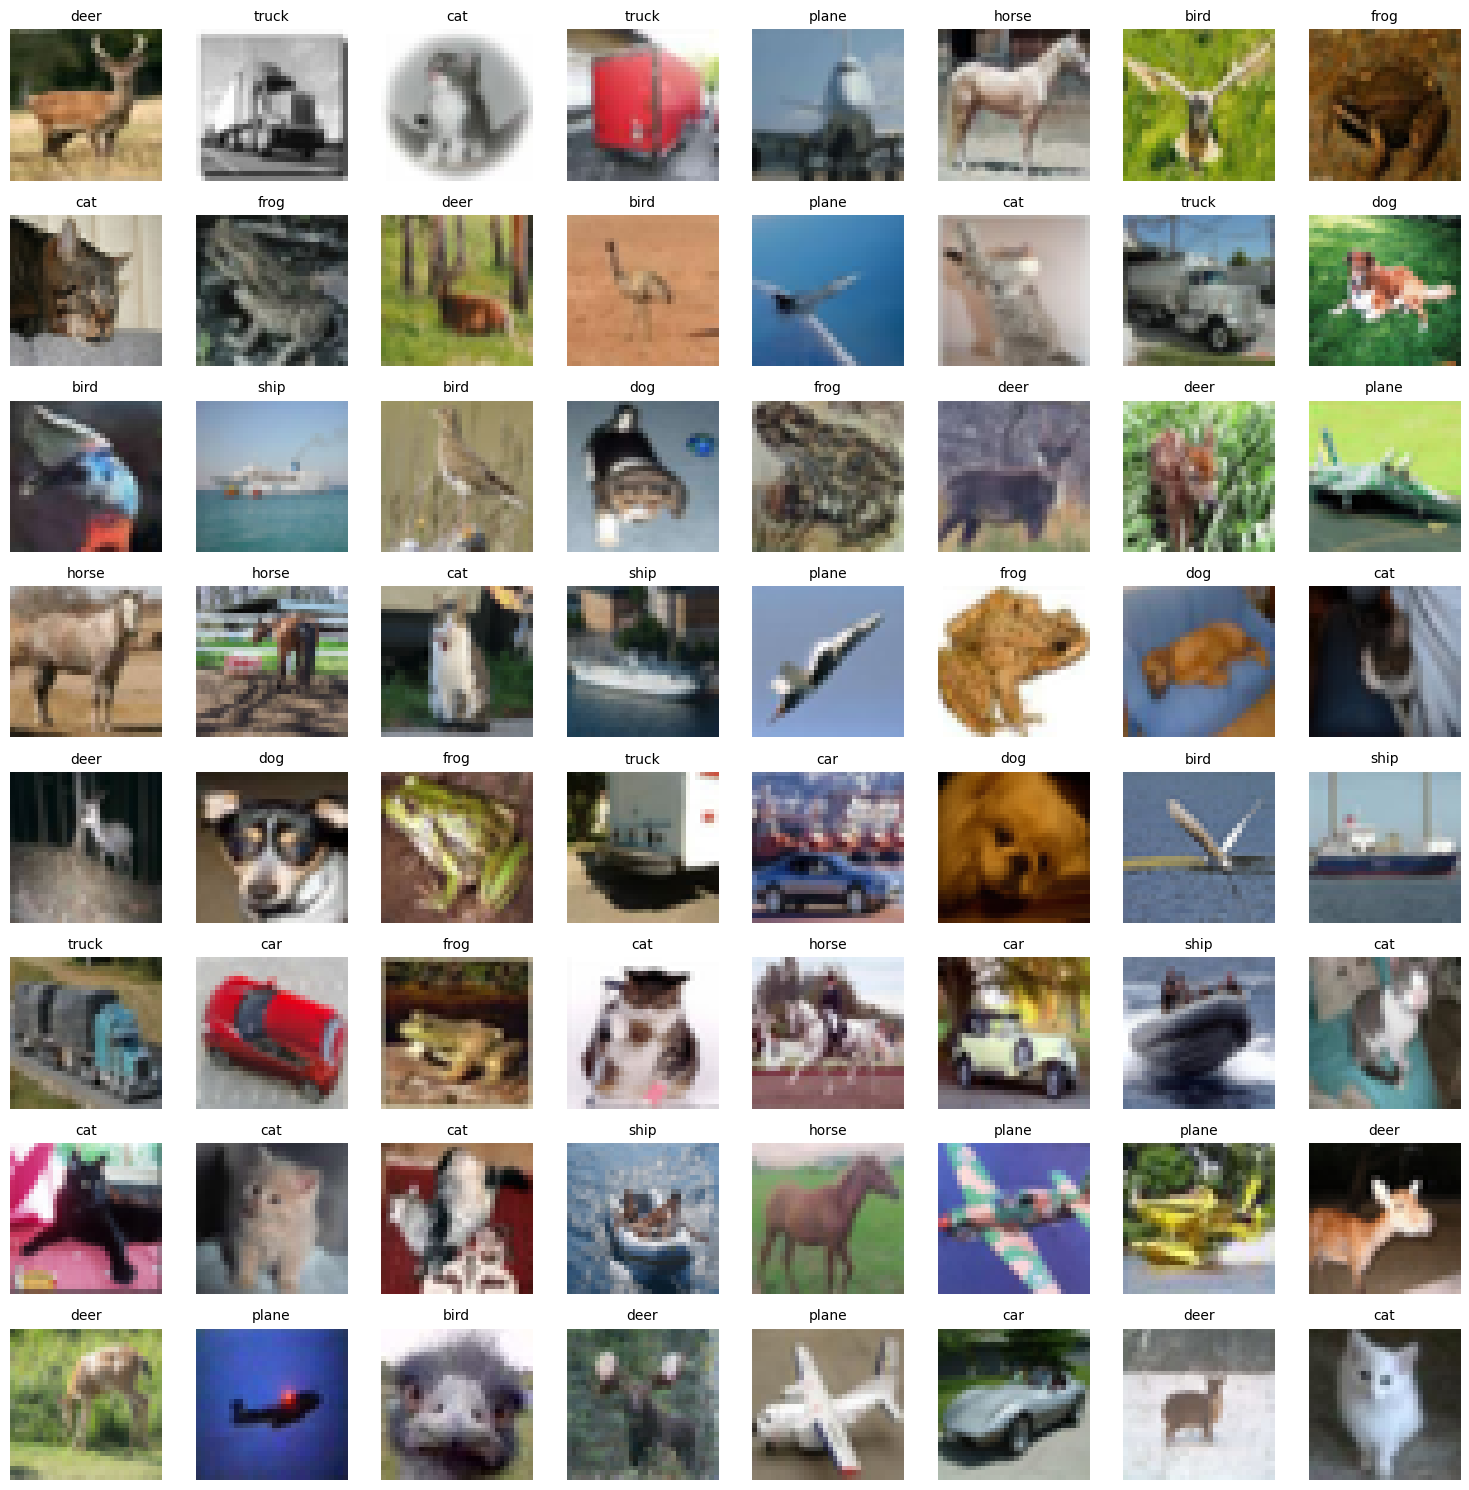

In [204]:
fig, _axs = plt.subplots(8, 8, figsize=(15, 15))

for _i in range(8):
    for _j in range(8):
        _img_index = _i * 8 + _j
        if _img_index < len(_images):
            _axs[_i, _j].imshow(np.transpose(_images[_img_index].numpy(), (1, 2, 0)))
            _axs[_i, _j].set_title(_class_names[_labels[_img_index]], fontsize=10)
            _axs[_i, _j].axis('off')

plt.tight_layout()
plt.show()



##  $\color{red}{\text{Checking GPU}}$

*Checks if CUDA is available to use GPU for computations, otherwise selects CPU, then prints which device is being used.*

In [205]:
_device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using the {_device} device")

Using the cpu device



##  $\color{red}{\text{Building a CNN model}}$

*Defines a convolutional neural network model (_Net) using PyTorch's neural network library (nn). The model includes two convolutional layers to extract features from images, followed by maxpooling to reduce dimensionality. This is followed by three fully connected layers (fc) which successively reduce the number of functions until the final layer produces ten outputs, corresponding to the classes in a data set. This structure is common for image classification tasks. Finally, an instance of the model is created and its structure is printed.*

In [206]:
class _Net(nn.Module):
    def __init__(self):
        super(_Net, self).__init__()
        self._conv_1 = nn.Conv2d(3, 6, 5)
        self._pool = nn.MaxPool2d(2, 2)
        self._conv_2 = nn.Conv2d(6, 16, 5)
        self._fc_1 = nn.Linear(16 * 5 * 5, 120)
        self._fc_2 = nn.Linear(120, 84)
        self._fc_3 = nn.Linear(84, 10)
    def forward(self, _x):
        _x = self._pool(F.relu(self._conv_1(_x)))
        _x = self._pool(F.relu(self._conv_2(_x)))
        _x = torch.flatten(_x, 1)
        _x = F.relu(self._fc_1(_x))
        _x = F.relu(self._fc_2(_x))
        _x = self._fc_3(_x)
        return _x

_net = _Net()
print(_net)

_Net(
  (_conv_1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (_conv_2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (_fc_1): Linear(in_features=400, out_features=120, bias=True)
  (_fc_2): Linear(in_features=120, out_features=84, bias=True)
  (_fc_3): Linear(in_features=84, out_features=10, bias=True)
)



##  $\color{red}{\text{Loss Function and Optimizer}}$

*Defines a loss function (_criterion) as cross-entropy loss and an optimizer (_optimizer) as stochastic gradient descent (SGD) to train the neural network model _net.*

In [207]:
_criterion = nn.CrossEntropyLoss()
_optimizer = optim.SGD(_net.parameters(), lr=0.001, momentum=0.9)


##  $\color{red}{\text{Training the model}}$

*Describes a training loop for a neural network where the model is trained over a specified number of epochs (_epochs). During each epoch, it iterates through all batches in the training data loader (_train_loader), calculates the loss (_loss) for each batch with a loss function (_criterion), performs backpropagation to update the model's weights with an optimizer (_optimizer), and accumulates the total loss (_running_loss ). After each epoch, the total loss and the number of completed batches are printed. Finally, it is announced that the training has ended.*

In [208]:
_epochs = 20

for _epoch in range(_epochs):
    _running_loss = 0.0

    for _i, _data in enumerate(_train_loader, 0):
        _inputs, _labels = _data
        _outputs = _net(_inputs)
        _loss = _criterion(_outputs, _labels)
        _optimizer.zero_grad()
        _loss.backward()
        _optimizer.step()
        _running_loss += _loss.item()
    print(f"Epoch: {_epoch}\nNumber of batches: {_i + 1}\nLoss: {_running_loss}")

print("End of training!")


Epoch: 0
Number of batches: 782
Loss: 1800.950147151947
Epoch: 1
Number of batches: 782
Loss: 1798.9009761810303
Epoch: 2
Number of batches: 782
Loss: 1782.1113572120667
Epoch: 3
Number of batches: 782
Loss: 1619.3224252462387
Epoch: 4
Number of batches: 782
Loss: 1526.3693149089813
Epoch: 5
Number of batches: 782
Loss: 1446.8392164707184
Epoch: 6
Number of batches: 782
Loss: 1362.42275929451
Epoch: 7
Number of batches: 782
Loss: 1290.1761790513992
Epoch: 8
Number of batches: 782
Loss: 1235.495466709137
Epoch: 9
Number of batches: 782
Loss: 1192.0389918088913
Epoch: 10
Number of batches: 782
Loss: 1161.731957435608
Epoch: 11
Number of batches: 782
Loss: 1133.526262164116
Epoch: 12
Number of batches: 782
Loss: 1107.0489246845245
Epoch: 13
Number of batches: 782
Loss: 1084.570912361145
Epoch: 14
Number of batches: 782
Loss: 1062.113934636116
Epoch: 15
Number of batches: 782
Loss: 1043.3305724859238
Epoch: 16
Number of batches: 782
Loss: 1027.1729052066803
Epoch: 17
Number of batches: 782


##  $\color{red}{\text{Accuracy of the model}}$

In [209]:
_correct = 0
_total = 0

with torch.no_grad():
    for _data in _train_loader:
        _images, _labels = _data
        _outputs = _net(_images)

        _, _predicted = torch.max(_outputs.data, 1)
        _total += _labels.size(0)
        _correct += (_predicted == _labels).sum().item()

_accuracy = 100 * _correct / _total
print(f"Model's accuracy on the test dataset: {_accuracy:.2f}%")


Model's accuracy on the test dataset: 56.53%



##  $\color{red}{\text{Saving the model}}$

In [210]:
torch.save(_net.state_dict(), "data/model.pth")
print("Saved PyTorch model state to /data/model.pth")

Saved PyTorch model state to /data/model.pth
